## Numerical Linear Algebra 
 Author: Vignesh Sathyaseelan (vsathyas@purdue.edu)

In [1]:
import numpy as np
import scipy.linalg  

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Define martrix 
A = np.array([[2,1,1,0],[4,3,3,1],[8,7,9,5],[6,7,9,8]])

### LU Decomposition:

It factors a matrix into the product of a lower triangular matrix and an upper triangular matrix.

In [3]:
def LU(A):
    U = np.copy(np.array(A,dtype=float))
    m, n = A.shape
    L = np.eye(n)
    for k in range(n-1):
        for j in range(k+1,n):
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:n] -= L[j,k] * U[k,k:n]
    return L, U

In [4]:
L,U = LU(A)

print(f'L = \n{L}\n')
print(f'U = \n{U}\n')

L = 
[[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [4. 3. 1. 0.]
 [3. 4. 1. 1.]]

U = 
[[2. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 2. 2.]
 [0. 0. 0. 2.]]



### PLU Decomposition:

It is the process of systematically selecting pivots for Gaussian elimination during the LU-decomposition of a matrix

In [5]:
P,L,U = scipy.linalg.lu(A)

print(f'P = \n{P}\n')
print(f'L = \n{L}\n')
print(f'U = \n{U}\n')

P = 
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

L = 
[[ 1.          0.          0.          0.        ]
 [ 0.75        1.          0.          0.        ]
 [ 0.5        -0.28571429  1.          0.        ]
 [ 0.25       -0.42857143  0.33333333  1.        ]]

U = 
[[ 8.          7.          9.          5.        ]
 [ 0.          1.75        2.25        4.25      ]
 [ 0.          0.         -0.85714286 -0.28571429]
 [ 0.          0.          0.          0.66666667]]



### Cholesky Decomposition:
It is a decomposition of a Hermitian, positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose

In [6]:
L = np.linalg.cholesky([[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]]) # we need a different positive definite matrix
U = np.transpose(L)

print(f'L = \n{L}\n')
print(f'U = \n{U}\n')

L = 
[[ 2.44948974  0.          0.          0.        ]
 [ 1.22474487  2.12132034  0.          0.        ]
 [ 1.63299316  1.41421356  2.30940108  0.        ]
 [ 3.26598632 -1.41421356  1.58771324  3.13249102]]

U = 
[[ 2.44948974  1.22474487  1.63299316  3.26598632]
 [ 0.          2.12132034  1.41421356 -1.41421356]
 [ 0.          0.          2.30940108  1.58771324]
 [ 0.          0.          0.          3.13249102]]



### Eigen Decomposition:

It is the factorization of a matrix into a canonical form, whereby the matrix is represented in terms of its eigenvalues and eigenvectors

In [7]:
values, vectors = np.linalg.eig(A)

print(f'values = \n{values}\n')
print(f'vectors = \n{vectors}\n')

values = 
[17.76674972  3.46610996  0.51478349  0.25235682]

vectors = 
[[ 0.05217777  0.24958023  0.21781155 -0.39040915]
 [ 0.19290936  0.34361034  0.46497954  0.86229217]
 [ 0.62976442  0.02230173 -0.78847685 -0.17999628]
 [ 0.75063988 -0.9050659   0.33860952 -0.26764575]]



### EignenValues - Power Method

In some problems, we only need to find the largest dominant eigenvalue and its corresponding eigenvector. In this case, we can use the power method - a iterative method that will converge to the largest eigenvalue. Let’s see the following how the power method works.

$$ AU_{k} = \lambda _{k} U_{k} $$

Where;

1) The A is the matrix. 

2) The $u_{k-1}$ is the eigenvector.

3) The $u_{1}$ is the inital guess eigenvector.

4) $\lambda _{k}$ is the correcspoding eigenvalue

Using $A^{-1}$ give you the lowest eigenvalue

In [8]:
def scale(x):
    scale_f = np.max(x)
    x_scale = np.round(x/ scale_f,2)
    return x_scale, np.round(scale_f,2)

def power_it(A,eig_vec,n_iter=25):  
    for i in range(n_iter):
        eig_vec,eig_val = scale(np.dot(A,eig_vec))
    return eig_vec,eig_val

print('Matrix A = \n {}'.format(A))
print('eigen vector = {} eigen value = {} \n'.format(*power_it(A,np.ones(len(A)))))

Matrix A = 
 [[2 1 1 0]
 [4 3 3 1]
 [8 7 9 5]
 [6 7 9 8]]
eigen vector = [0.07 0.26 0.84 1.  ] eigen value = 17.8 



### Singular Value Decomposition: 

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

In [9]:
U, S, V = np.linalg.svd(A, full_matrices=True)

print(f'U = \n{U}\n')
print(f'S = \n{S}\n')
print(f'V = \n{V}\n')

U = 
[[-0.09405951 -0.37837471  0.38179085 -0.83798636]
 [-0.25637107 -0.54175772  0.58921648  0.54184536]
 [-0.67402341 -0.39256817 -0.62495603 -0.0318219 ]
 [-0.68638118  0.63970414  0.3413058  -0.05630135]]

S = 
[21.85847672  3.45065757  0.50598155  0.2096204 ]

V = 
[[-0.49061414 -0.4751477  -0.59962157 -0.41711679]
 [-0.64512366 -0.07931708  0.06392284  0.75725698]
 [ 0.3332812   0.32390239 -0.79728567  0.38515769]
 [-0.48170206  0.81426698 -0.02652189 -0.32284517]]



### Application of SVD: Image Compression

Image matrix 
 [[11.33 11.33 13.33 ... 47.33 46.67 46.  ]
 [10.33 11.33 13.33 ... 46.67 46.67 46.67]
 [10.33 12.33 13.33 ... 46.67 47.33 47.33]
 ...
 [28.67 29.67 28.33 ... 25.   25.   26.  ]
 [29.33 29.67 28.33 ... 26.   26.   26.  ]
 [29.33 29.67 27.33 ... 27.   27.   26.33]]


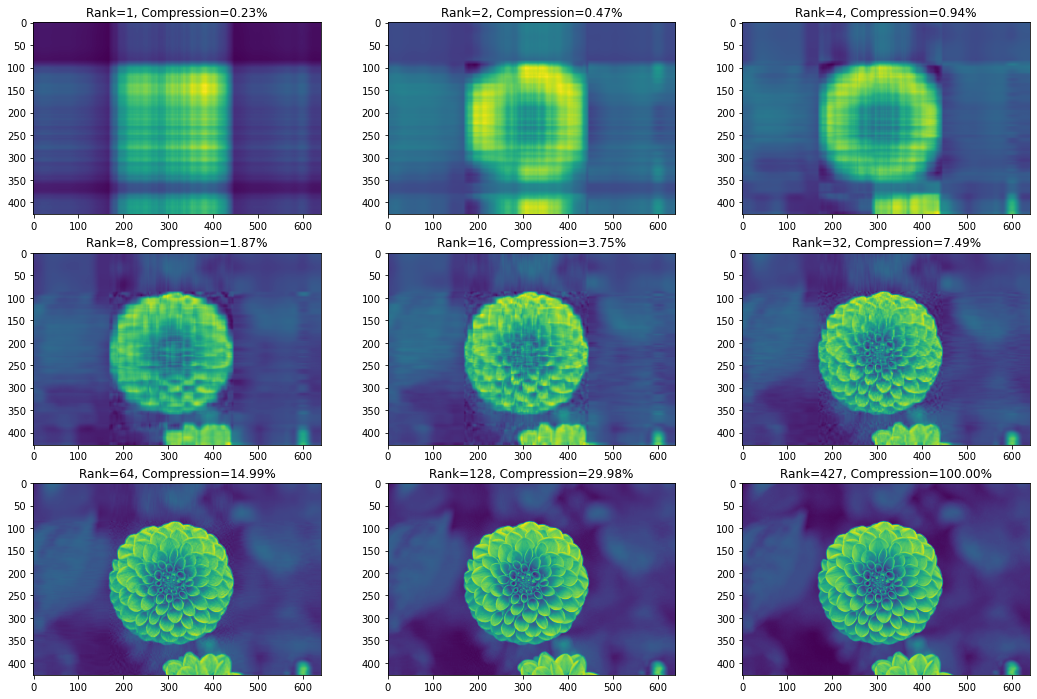

In [10]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

#Average thr RGB values
image = np.round(load_sample_image('flower.jpg').mean(axis=2),2)

print('Image matrix \n', image)

#SVD
U, s, Vt = np.linalg.svd(image)
Sigma = np.zeros_like(image, dtype=float)
Sigma[:427, :427] = np.diag(s)

max_rank = np.min(image.shape)
rank_arr = list(2**(np.arange(0,8))) + [max_rank]

fig, axes = plt.subplots(3, 3, figsize=(len(rank_arr)*2, 3*4))

for count_r,r, in enumerate(rank_arr):
    image_approx = np.matmul(U[:, :r], np.matmul(Sigma[:r,:r], Vt[:r, :]))
    compression = (r/max_rank)*100
    
    ax = axes.ravel()[count_r]
    ax.imshow(image_approx, cmap='viridis')
    ax.set_title(f'Rank={r}, Compression={compression:.2f}%')

### SVD for sparse: Power Iteration for top right singular vector of a sparse matrix 

>Input: $X\in \cal{R}^{n \times p}$ (sparse matrix)   
>Output: $v_1$ (top right singular vector of centered matrix)   
> 
>$\mu = \frac{1}{n}\sum_{i=1}^n x_i$  
>$v^{(0)} \sim \text{Normal}(0,I)$  
> 
>For $i=1$ to $K$ iterations  
>$\quad\quad v = (X-\mathbb{1}\mu^T)^T (X-\mathbb{1}\mu^T)v^{(i-1)}$  
>$\quad\quad v^{(i)} = \frac{v}{\|v\|_2}$  
>Return $v^{(i)}$  

In [11]:
def power_iter(X, num_iter=1000):
   
    v = np.random.randn(X.shape[1])         # Initialize with random vector with shape (d,)
    one_vec = np.ones(X.shape[0])           # All ones vector with shape (n,)
    mu_row_matrix = np.mean(X, axis=0)      # Returns a 1 row matrix with shape (d, 1) since X is of "matrix" type 
    mu = np.array(mu_row_matrix).squeeze()  # Convert from a sparse column matrix to a dense 1D array with shape (d,)
    
    one_vec = one_vec.reshape(-1,1)
    mu = mu.reshape(-1,1)
    v = v.reshape(-1,1)
    
    for i in range(num_iter):
        A = X - one_vec.dot(mu.T)
        v = ((A.T).dot(A)).dot(v)
        v = v/np.linalg.norm(v,2)

    v = np.array(v).squeeze()
    
    return v

#Make Sparse Satrix
from scipy.sparse import csr_matrix

X = np.random.random([100,100])
X[X<0.9] = 0
X_sparse = csr_matrix(X)

print(f'X_sparse has {np.round(100-np.sum(X_sparse!=0)/50,2)}% of zeros \n')
print('Top right singular vector = \n {} \n'.format(power_iter(X_sparse).squeeze()))

X_sparse has 80.06% of zeros 

Top right singular vector = 
 [-0.0675059  -0.0280571   0.08210952 -0.02442522 -0.07932128  0.00078857
  0.13109366  0.06276867 -0.20230975  0.02321873  0.03457313  0.13942381
  0.27408792  0.16268622  0.0268892  -0.1088427   0.03637911  0.09938049
  0.03113155 -0.09881416 -0.01741875  0.03438468 -0.13769041 -0.09651919
  0.0353764  -0.00579262 -0.06912894 -0.12093733  0.01981689 -0.00159414
 -0.06239472  0.05960335 -0.23744581  0.09607299 -0.13219332  0.06379678
  0.00302388 -0.1503426   0.09585286 -0.02437592 -0.04872198  0.1829147
  0.05584342 -0.30768768 -0.07912639 -0.03348614 -0.00165088 -0.0555615
  0.01707405  0.01264676  0.07095933  0.00408577  0.23445854  0.01536841
  0.08785258  0.03577163  0.10625299  0.08130792  0.01935952  0.15860063
 -0.05110993 -0.00968989  0.04927087 -0.15439942 -0.16958494  0.08632202
  0.00522011  0.07948574 -0.05735204 -0.19045451 -0.03151249  0.04240753
 -0.15076649  0.15259682 -0.09990369 -0.00461398  0.02937661 -0.0